In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data.csv')

# Remove rows with missing data
cleaned_df = df.dropna()

# Save the cleaned data to a new CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)

# Print a success message
print("The data has been cleaned and saved to 'cleaned_data.csv'.")


The data has been cleaned and saved to 'cleaned_data.csv'.


In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('cleaned_data.csv')

# Filter data for Twitter and Facebook
combined_data = df[df['Platform'].isin(['Twitter', 'Facebook'])]

# Save the combined data to a new CSV file
combined_data.to_csv('Twitter_Facebook_data.csv', index=False)

print("We filter data for Twitter and Facebook and Save the combined data to 'Twitter_Facebook_data.csv'. ")



We filter data for Twitter and Facebook and Save the combined data to 'Twitter_Facebook_data.csv'. 


In [ ]:
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Twitter_Facebook_data.csv')

data = data[data['Agency'].isin(['311', 'ACS', 'CAU', 'Change by Us', 'City Charter', 'City Store', 'Culture', 'DCA', 'DEP',\
                                'DFTA (aging)', 'DFTA', 'DHS', 'DHS (Homeless Service)', 'DOB', 'DOB: Cool Roofs',\
                                'DOB: UrbanCanvas', 'DOE', 'NYC Schools', 'NYC TeachingFellows', 'I teach NYC', 'NYC Health',\
                                'Eating Healthy NYC', 'NYCKnows', 'NYCQuites', 'DOI','NYC IT & Telecomm',\
                                 'DOT (Department of Transportaion)', 'JanetteSadikKhan (Not Available)',\
                                'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks',\
                                'Pearl_Squirrel (not available)', 'DYCD', 'NYC zerowaste',  'Applied Sciences NYC',\
                                'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)',\
                                'FUND', 'HHC', 'HDP', 'HIA', 'HRA (Human Resource Administration)', 'NYC Dad', 'NYC LatinMedia',\
                                'LPC', 'Materials for the Arts', 'MOIA', "NYC Mayor's Office of Immigrant Affairs",\
                                'MOME', 'MOPD', 'NYCgo', 'nycshop', 'NYCgo.au', 'NYCgo.br', 'NYCgo.ca','NYCgo.de',\
                                'NYCgo.es', 'NYCgo.fr', 'NYCgo.it', 'NYCgo.uk', 'NYC Digital', 'NYC Gov','NYC Mayors Cup',\
                                'NYC Waterfront', 'NYCCFB', 'NYC Votes', 'NYCGLOBAL', 'NYCHA', 'NYCService',\
                                'OCDV','YouCanTooNYC', 'NYC Recycles2', \
                                'SBS (Small Business Service)', 'SBS', 'SBS - Workforce1', 'SBS - Workforce1', 'VAC',\
                                'Vets'])]



# Filter for Instagram and Twitter data
facebook_data = data[data['Platform'] == 'Facebook']
twitter_data = data[data['Platform'] == 'Twitter']

# Merge Instagram and Twitter data based on the date
merged_data = pd.merge(facebook_data, twitter_data, on='Agency', suffixes=('_facebook', '_twitter'))

# Select the number of downloads for Facebook as X (independent variable)
X = merged_data['Likes/Followers/Visits/Downloads_facebook'].values.reshape(-1, 1)
print(len(X))

# Select the number of downloads for Twitter as y (dependent variable)
y = merged_data['Likes/Followers/Visits/Downloads_twitter'].values.reshape(-1, 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train1, type(X_train1))
print(X_test1, type(X_test1))



16595
[[3091.]
 [ 356.]
 [2424.]
 ...
 [8357.]
 [ 300.]
 [1166.]] <class 'numpy.ndarray'>
[[ 356.]
 [8261.]
 [3734.]
 ...
 [ 289.]
 [1809.]
 [3602.]] <class 'numpy.ndarray'>


The weight vector for polynominal regression of degree 1 is :
[[4.02045272e+03]
 [4.40484657e-01]]
The weight vector for polynominal regression of degree 2 is :
[[ 2.10962992e+03]
 [ 1.14454734e+00]
 [-9.01712725e-06]]
The weight vector for polynominal regression of degree 3 is :
[[ 1.87440544e+03]
 [ 1.26401214e+00]
 [-1.30913278e-05]
 [ 2.91475051e-11]]
The weight vector for polynominal regression of degree 4 is :
[[ 2.99688777e+03]
 [ 4.73903189e-01]
 [ 4.49400319e-05]
 [-1.04156938e-09]
 [ 5.55076125e-15]]
The weight vector for polynominal regression of degree 5 is :
[[ 3.87966095e+03]
 [-3.91055237e-01]
 [ 1.52135350e-04]
 [-4.60668166e-09]
 [ 4.91593076e-14]
 [-1.76247667e-19]]
The weight vector for polynominal regression of degree 6 is :
[[ 3.75341143e+03]
 [-2.37541154e-01]
 [ 1.26076917e-04]
 [-3.27925290e-09]
 [ 2.10877180e-14]
 [ 8.43419660e-20]
 [-8.76985977e-25]]
The weight vector for polynominal regression of degree 7 is :
[[ 3.15117782e+03]
 [ 6.16969672e-01]
 [-5.654946

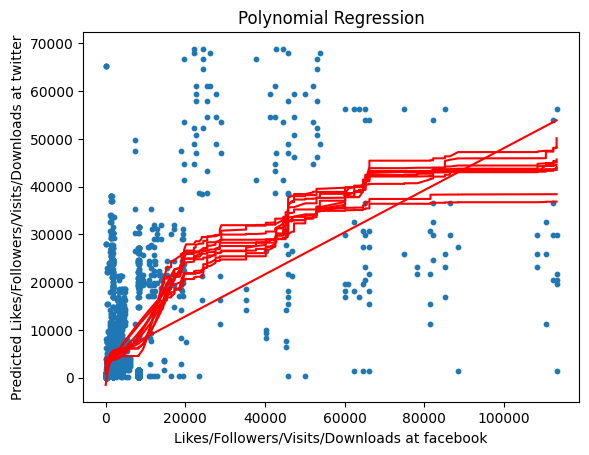

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define degree of polynomial
degree = 11

# Create polynomial features matrix
def create_polynomial_matrix(X, degree):
    X_poly_mat = []

    for i in range(1, degree + 1):
        X_poly = np.ones((len(X), 1))
        for d in range(1, i + 1):
            X_poly = np.concatenate((X_poly, X**d), axis=1)
        X_poly_mat.append(X_poly)
    return X_poly_mat

X_train_poly_mat = create_polynomial_matrix(X_train1, degree)

theta_mat = []
for ele in X_train_poly_mat:
    theta = np.linalg.inv(ele.T.dot(ele)).dot(ele.T).dot(y_train1)# Solve for coefficients using normal equation (closed-form)
    theta_mat.append(theta)

k = 1
for ele in theta_mat:
    print(f'The weight vector for polynominal regression of degree {k} is :')
    print(ele)
    k += 1

# Make predictions

X_test_poly_mat = create_polynomial_matrix(X_test1, degree)

def predict(X_poly_mat, theta_mat):
    y_pred_mat = []
    for ele1 , ele2 in zip(X_poly_mat, theta_mat):
        y_pred = ele1.dot(ele2)
        y_pred_mat.append(y_pred)
    return y_pred_mat

y_pred_mat = predict(X_test_poly_mat, theta_mat)

# Evaluate the model
def mean_squared_error(y_true, y_pred_mat):
    mean_list = []
    for ele in y_pred_mat:
        value = np.mean((y_true - ele)**2)
        mean_list.append(value)
    return mean_list

def r2_score(y_true, y_pred_mat):
    r2_list = []
    denominator = np.sum((y_true - np.mean(y_true))**2)
    for ele in y_pred_mat:
        numerator = np.sum((y_true - ele)**2)
        val = 1 - (numerator / denominator)
        r2_list.append(val)
    return r2_list

mse_list = mean_squared_error(y_test1, y_pred_mat)
r2_list = r2_score(y_test1, y_pred_mat)

index = 1
for ele1, ele2 in zip(mse_list, r2_list):
    print(f"Root mean Squared Error for {index} degree polynominal model : {pow(ele1, 0.5)}")
    print(f"R-squared for {index} degree polynominal model : {ele2}")
    index += 1

rmse_1 = pow(mse_list[0], 0.5)
r2_1 = r2_list[0]

rmse_2 = pow(min(mse_list), 0.5)
r2_2 = max(r2_list)


# Plot data and polynomial regression curve
plt.scatter(X_test1, y_test1, s=10)

for ele in y_pred_mat:
    plt.plot(sorted(X_test1), sorted(ele), color='r')
plt.xlabel('Likes/Followers/Visits/Downloads at facebook')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Polynomial Regression')
plt.show()



In [ ]:
def varience(y):
    length = len(y)
    if length == 0:
        return 0
    else:
        mean = sum(y) / length
        v = sum((y - mean) ** 2) / length
        return v

def split_dataset(X, node_indices, feature):
    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices

def compute_information_gain(X, y, node_indices, feature):
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # You need to return the following variables correctly
    information_gain = 0

    if(len(node_indices) != 0):
        w_left = len(left_indices) / len(node_indices)
        w_right = len(right_indices) / len(node_indices)
        information_gain = varience(y_node) - ((w_left * varience(y_left)) + (w_right * varience(y_right)))
        return information_gain
    else:
        return information_gain

def get_best_split(X, y, node_indices):
    # Some useful variables
    num_features = X.shape[1]

    # You need to return the following variables correctly
    best_feature = -1
    max_info_gain = 0

    for i in range(num_features):
        info_gain = compute_information_gain(X, y, node_indices, i)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = i

    return best_feature

def build_tree_recursive(X, y, node_indices, max_depth, current_depth):

    # Maximum depth reached or pure node - stop splitting
    if((current_depth == max_depth) or (len(node_indices)) <= 15):
        if(len(node_indices) != 0):
            avg_value = sum(y[node_indices])/len(node_indices)  # Calculate average value at leaf node.
            avg_value = int(avg_value)
            return {'is_leaf': True, 'avg_value': avg_value}

    else:
        print('-', end = ' ')
        # Otherwise, get best split and split the data
        # Get the best feature and threshold at this node
        best_feature = get_best_split(X, y, node_indices)

        # Split the dataset at the best feature
        left_indices, right_indices = split_dataset(X, node_indices, best_feature)

        # continue splitting the left and the right child. Increment current depth
        left_child = build_tree_recursive(X, y, left_indices, max_depth, current_depth + 1)
        right_child = build_tree_recursive(X, y, right_indices, max_depth, current_depth + 1)

        return {'is_leaf': False, 'feature': best_feature, 'left_child': left_child, 'right_child': right_child}

def build_tree(X, y, max_depth):
    return build_tree_recursive(X, y, list(range(len(X))), max_depth, 0)


def predict_tree(tree, sample):
    if tree['is_leaf']:  # Leaf node
        return tree['avg_value']
    else:  # Non-leaf node
        feature_index = tree['feature']
        if sample[feature_index] == 1:
            return predict_tree(tree['left_child'], sample)  # Move to left child
        else:
            return predict_tree(tree['right_child'], sample)  # Move to right child

def predict_tree_on_test_set(tree, X):
    predictions = []
    for sample in X:
        prediction = predict_tree(tree, sample)
        predictions.append(prediction)
    return predictions




def train_test_split_manual(X, y, test_size):
    # Compute the number of items to include in the test set
    num_test_items = int(len(X) * test_size)

    np.random.seed(0)

    # Randomly choose indices for the test set
    test_indices = np.random.choice(len(X), size=num_test_items, replace=False)

    # All other indices are part of the training set
    train_indices = np.setdiff1d(np.arange(len(X)), test_indices)

    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Twitter_Facebook_data.csv')

# Assuming your dataset is stored in a DataFrame named df
# Convert "Date Sampled" column to datetime and extract month
data['Month'] = pd.to_datetime(data['Date Sampled']).dt.month

data.drop(columns=['Date Sampled'], inplace=True)

data = data[data['Agency'].isin(['311', 'ACS', 'CAU', 'Change by Us', 'City Charter', 'City Store', 'Culture', 'DCA', 'DEP',\
                                'DFTA (aging)', 'DFTA', 'DHS', 'DHS (Homeless Service)', 'DOB', 'DOB: Cool Roofs',\
                                'DOB: UrbanCanvas', 'DOE', 'NYC Schools', 'NYC TeachingFellows', 'I teach NYC', 'NYC Health',\
                                'Eating Healthy NYC', 'NYCKnows', 'NYCQuites', 'DOI','NYC IT & Telecomm',\
                                 'DOT (Department of Transportaion)', 'JanetteSadikKhan (Not Available)',\
                                'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks',\
                                'Pearl_Squirrel (not available)', 'DYCD', 'NYC zerowaste',  'Applied Sciences NYC',\
                                'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)',\
                                'FUND', 'HHC', 'HDP', 'HIA', 'HRA (Human Resource Administration)', 'NYC Dad', 'NYC LatinMedia',\
                                'LPC', 'Materials for the Arts', 'MOIA', "NYC Mayor's Office of Immigrant Affairs",\
                                'MOME', 'MOPD', 'NYCgo', 'nycshop', 'NYCgo.au', 'NYCgo.br', 'NYCgo.ca','NYCgo.de',\
                                'NYCgo.es', 'NYCgo.fr', 'NYCgo.it', 'NYCgo.uk', 'NYC Digital', 'NYC Gov','NYC Mayors Cup',\
                                'NYC Waterfront', 'NYCCFB', 'NYC Votes', 'NYCGLOBAL', 'NYCHA', 'NYCService',\
                                'OCDV','YouCanTooNYC', 'NYC Recycles2', \
                                'SBS (Small Business Service)', 'SBS', 'SBS - Workforce1', 'SBS - Workforce1', 'VAC',\
                                'Vets'])]

#print(data)

X = data[['Agency', 'Platform', 'Month']]

y = data[['Likes/Followers/Visits/Downloads']]
y = y.values

# y = y[0: 2500, : ]

y = y.reshape(len(y))
# print(y)

one_hot_encoded_data = pd.get_dummies(X, columns = ['Agency', 'Platform', 'Month'], dtype = int)

one_hot_encoded_data = one_hot_encoded_data.values

# #one_hot_encoded_data = one_hot_encoded_data[0: 2500, :]


print(one_hot_encoded_data)

# #X = X.values
# print(one_hot_encoded_data)

c = one_hot_encoded_data.shape[1]
print(c)

X_train2, X_test2, y_train2, y_test2 = train_test_split_manual(one_hot_encoded_data, y, test_size=0.2)



#print(X_train, len(X_train))
#print(y_train, len(y_train))

# Train the tree
max_depth = 7 # Set your desired max depth
tree = build_tree(X_train2, y_train2, max_depth)

#print(tree)

# Make predictions on test set
predictions = predict_tree_on_test_set(tree, X_test2)

# Now you have predictions for your test dataset
# You can further evaluate the predictions as needed

#print(predictions)



[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]
91
- - - - - - - - - - - - - - - - - - 

In [ ]:
#print('Actual like:')
#print(y_test, type(y_test))

predictions = np.array(predictions)

#print('Predicted like:')
#print(predictions, type(predictions))

error1 = np.mean((y_test2 - predictions)**2)
error1 = pow(error1, 0.5)
print('The root mean squared error for Decision Tree is:', error1)


denominator = np.sum((y_test2 - np.mean(predictions))**2)
numerator = np.sum((y_test2 - predictions)**2)
val1 = 1 - (numerator / denominator)
print('The R2 score for Decision Tree is:', val1)

rmse_3 = error1
r2_3 = val1


The root mean squared error for Decision Tree is: 4927.188790331218
The R2 score for Decision Tree is: 0.8089764600439032


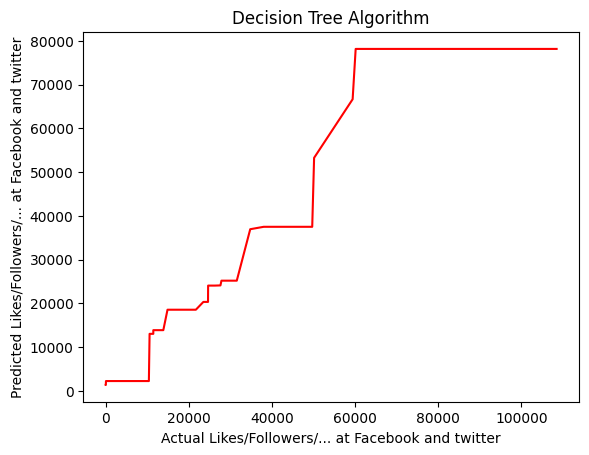

In [ ]:
#print(np.shape(y_test))
#print(np.shape(predictions))

plt.plot(sorted(y_test2), sorted(predictions), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('Decision Tree Algorithm')
plt.show()



In [ ]:
def build_forest(X, y, n_trees, max_depth):
    forest = []
    for _ in range(n_trees):
        # Create a bootstrap sample
        indices = np.random.choice(len(X), size= int(len(X) * 0.8), replace=True)
        X_sample, y_sample = X[indices], y[indices]

        # Build a tree on the bootstrap sample
        tree = build_tree(X_sample, y_sample, max_depth)
        forest.append(tree)
    return forest

def predict_forest(forest, sample):
    predictions = [predict_tree(tree, sample) for tree in forest]
    return np.mean(predictions)

def predict_forest_on_test_set(forest, X):
    predictions = [predict_forest(forest, sample) for sample in X]
    return predictions



In [ ]:

# Train the forest
n_trees = 100  # Set your desired number of trees
max_depth = 7  # Set your desired max depth
forest = build_forest(X_train2, y_train2, n_trees, max_depth)

# Make predictions on test set
predictions1 = predict_forest_on_test_set(forest, X_test2)

# Now you have predictions for your test dataset
# You can further evaluate the predictions as needed

print('')

# Calculate the mean squared error
error2 = np.mean((y_test2 - predictions1)**2)
error2 = pow(error2, 0.5)
print('The root mean squared error for Random Forest is:', error2)

# Calculate the R2 score
val2 = 1 - (np.sum((y_test2 - predictions1)**2) / np.sum((y_test2 - np.mean(y_test2))**2))
print('The R2 score for Random Forest is:', val2)

rmse_4 = error2
r2_4 = val2



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

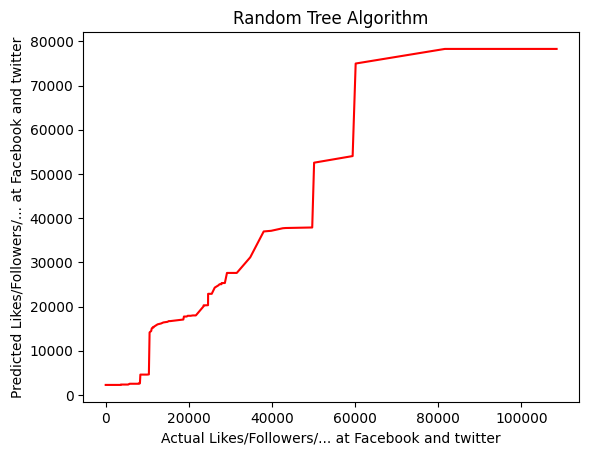

In [ ]:
#print(np.shape(y_test))
#print(np.shape(predictions))

plt.plot(sorted(y_test2), sorted(predictions1), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('Random Tree Algorithm')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Twitter_Facebook_data.csv')

# Convert "Date Sampled" column to datetime and extract month
data['Month'] = pd.to_datetime(data['Date Sampled']).dt.month
data.drop(columns=['Date Sampled'], inplace=True)

# Filter the data
data = data[data['Agency'].isin(['311', 'ACS', 'CAU', 'Change by Us', 'City Charter', 'City Store', 'Culture', 'DCA', 'DEP',
                                'DFTA (aging)', 'DFTA', 'DHS', 'DHS (Homeless Service)', 'DOB', 'DOB: Cool Roofs',
                                'DOB: UrbanCanvas', 'DOE', 'NYC Schools', 'NYC TeachingFellows', 'I teach NYC', 'NYC Health',
                                'Eating Healthy NYC', 'NYCKnows', 'NYCQuites', 'DOI','NYC IT & Telecomm',
                                 'DOT (Department of Transportaion)', 'JanetteSadikKhan (Not Available)',
                                'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks',
                                'Pearl_Squirrel (not available)', 'DYCD', 'NYC zerowaste',  'Applied Sciences NYC',
                                'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)',
                                'FUND', 'HHC', 'HDP', 'HIA', 'HRA (Human Resource Administration)', 'NYC Dad', 'NYC LatinMedia',
                                'LPC', 'Materials for the Arts', 'MOIA', "NYC Mayor's Office of Immigrant Affairs",
                                'MOME', 'MOPD', 'NYCgo', 'nycshop', 'NYCgo.au', 'NYCgo.br', 'NYCgo.ca','NYCgo.de',
                                'NYCgo.es', 'NYCgo.fr', 'NYCgo.it', 'NYCgo.uk', 'NYC Digital', 'NYC Gov','NYC Mayors Cup',
                                'NYC Waterfront', 'NYCCFB', 'NYC Votes', 'NYCGLOBAL', 'NYCHA', 'NYCService',
                                'OCDV','YouCanTooNYC', 'NYC Recycles2',
                                'SBS (Small Business Service)', 'SBS', 'SBS - Workforce1', 'SBS - Workforce1', 'VAC',
                                'Vets'])]

X = data[['Agency', 'Platform', 'Month']]
y = data[['Likes/Followers/Visits/Downloads']]

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Agency', 'Platform', 'Month'], dtype=int)

# # Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBRegressor model
model = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train3, y_train3)


# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on test set using the best model
best_model = grid_search.best_estimator_
predictions2 = best_model.predict(X_test3)

# Calculate the mean squared error
mse = mean_squared_error(y_test3, predictions2)
mse = pow(mse, 0.5)
print('Root mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test3, predictions2)
print('R2 Score:', r2)


rmse_5 = mse
r2_5 = r2


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Root mean Squared Error: 5335.944330454404
R2 Score: 0.7816510041779375


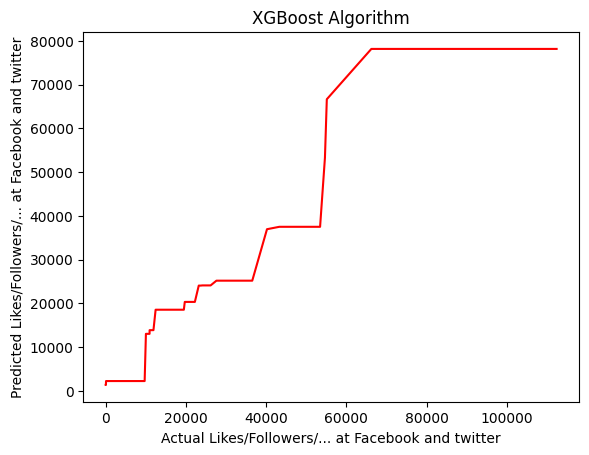

In [ ]:
y_test3 = np.array(y_test3)
y_test3 = y_test3.reshape(len(y_test3))

#print(np.shape(y_test1))
#print(np.shape(predictions))

plt.plot(sorted(y_test3), sorted(predictions), color='r')
plt.xlabel('Actual Likes/Followers/... at Facebook and twitter')
plt.ylabel('Predicted Likes/Followers/... at Facebook and twitter')
plt.title('XGBoost Algorithm')
plt.show()




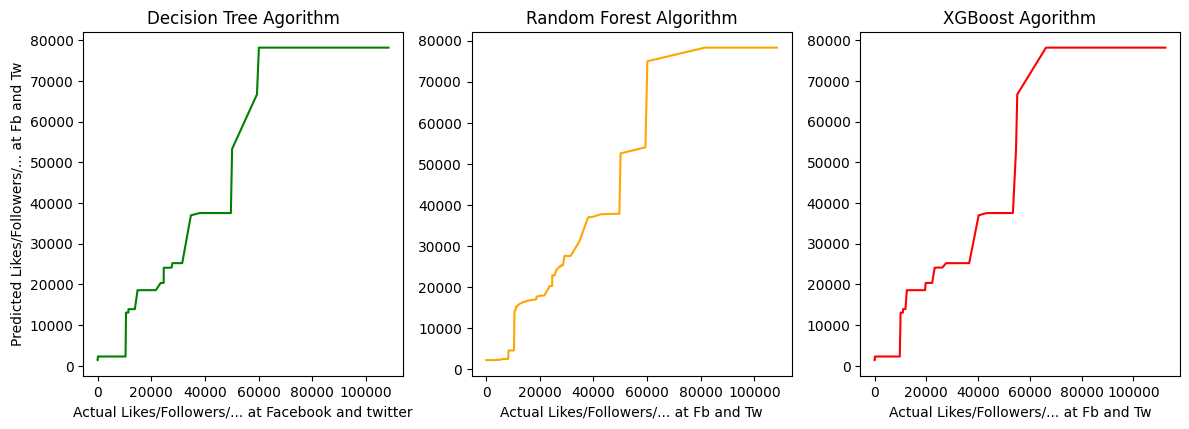

------------------Decision Tree Algorithm--------------------------
The root mean squared error for Decision Tree is: 4927.188790331218
The R2 score for Decision Tree is: 0.8089764600439032

-----------------------Random Forest Algorithm----------------------
The root mean squared error for Random Forest is: 4920.012979010444
The R2 score for Random Forest is: 0.8093891906951729

-----------------------XGBoost Algorithm----------------------
The root mean squared error for XGBoost Algorithm is: 5335.944330454404
R2 Score: 0.7816510041779375


In [ ]:
# importing required library
import matplotlib.pyplot as plt

# creating grid for subplots
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)


ax1 = plt.subplot2grid(shape=(3, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(3, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(3, 3), loc=(0, 2))


# plotting subplots

ax1.plot(sorted(y_test2), sorted(predictions), color='green')
ax1.set_title('Decision Tree Agorithm')
ax1.set_xlabel('Actual Likes/Followers/... at Facebook and twitter')
ax1.set_ylabel('Predicted Likes/Followers/... at Fb and Tw')

ax2.plot(sorted(y_test2), sorted(predictions1), color='orange')
ax2.set_title('Random Forest Algorithm')
ax2.set_xlabel('Actual Likes/Followers/... at Fb and Tw')

ax3.plot(sorted(y_test3), sorted(predictions), color='red')
ax3.set_title('XGBoost Agorithm')
ax3.set_xlabel('Actual Likes/Followers/... at Fb and Tw')

# automatically adjust padding horizontally
# as well as vertically.
plt.tight_layout()

# display plot
plt.show()

print('------------------Decision Tree Algorithm--------------------------')
print('The root mean squared error for Decision Tree is:', error1)
print('The R2 score for Decision Tree is:', val1)

print('\n-----------------------Random Forest Algorithm----------------------')
print('The root mean squared error for Random Forest is:', error2)
print('The R2 score for Random Forest is:', val2)

print('\n-----------------------XGBoost Algorithm----------------------')
print('The root mean squared error for XGBoost Algorithm is:', mse)
print('R2 Score:', r2)


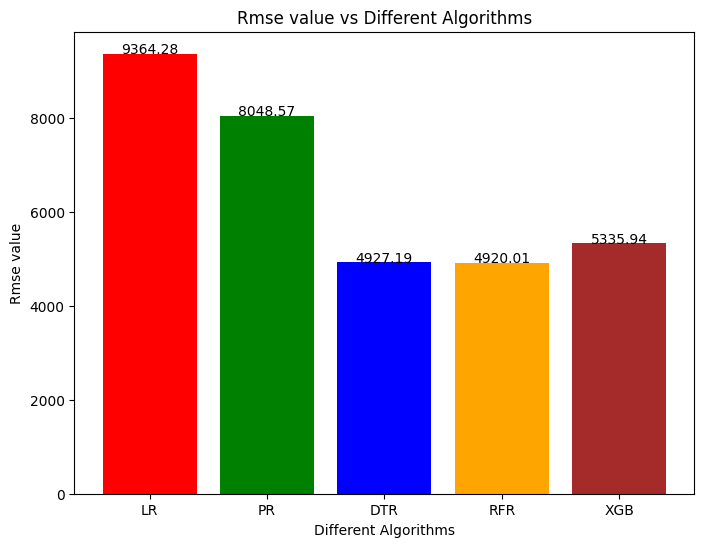

In [ ]:
rmse_list = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y = rmse_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('Rmse value vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # visualizing the plot
    plt.show()



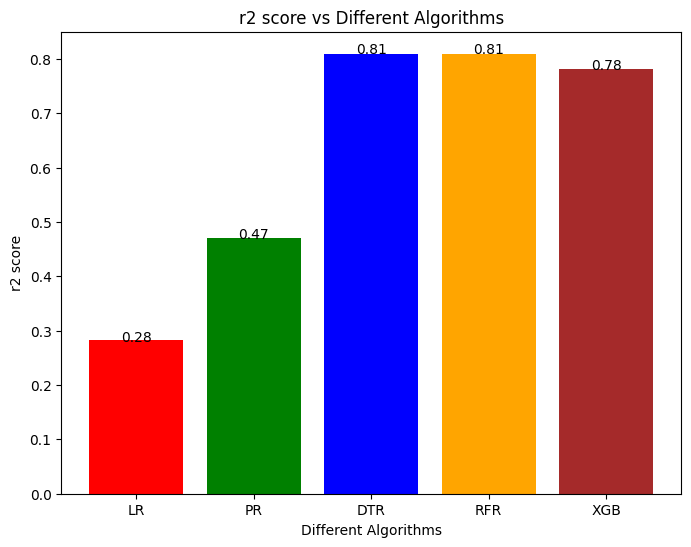

In [ ]:
r2_score_list = [r2_1, r2_2, r2_3, r2_4, r2_5]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y = r2_score_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('r2 score vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')

    # visualizing the plot
    plt.show()


<ipython-input-21-2cd23a14d20c>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


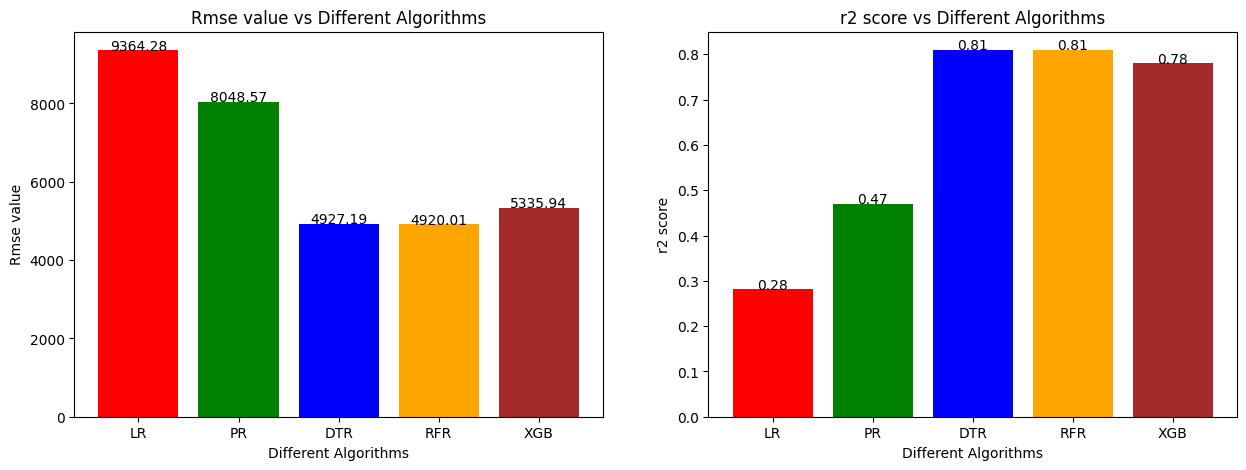

In [ ]:
rmse_list = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5]
r2_score_list = [r2_1, r2_2, r2_3, r2_4, r2_5]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y1 = rmse_list
    y2 = r2_score_list

    plt.subplots(figsize=(15, 5))

    # using subplot function and creating
    # plot one
    plt.subplot(1, 2, 1)
    plt.bar(x, y1, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])
    addlabels(x, y1)
    plt.title('Rmse value vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.bar(x, y2, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])
    addlabels(x, y2)
    plt.title('r2 score vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')
    plt.show()
